In [1]:
import numpy as np
from helpers import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
N = 3
loc = [0,0.1, 0.1]
scale = [0.004,0.002, 0.003]
beta = [1, 1, 2]
market_tail_exp = 0.01
sims = 10000
L = np.array([[0,80, 20], [40, 0, 0], [15, 0,0]])
R = np.array([[0,0,0], [0,0,0], [0,0,0]])
w_0 = [100,150, 20]

In [3]:
def wealth_simulation(N, loc, scale, beta, market_tail_exp, L, R, w_0, sims):
    D = np.multiply(L, 1 + R)
    bank_portfolios_returns = generate_bank_portfolios(loc, scale, beta, market_tail_exp, sims)
    a_0 = [w_0[i] - np.sum(L[:,i]) + np.sum(L[i,:]) for i in range(N)] # innitial equity values
    a_0 = np.array([a_0 for i in range(sims)])
    a_1 = np.multiply(a_0, 1 + bank_portfolios_returns)
    payment_vec = [fictitious_default(a_1[i,:], D) for i in range(sims)]
    Pi = normalize(D, axis=1, norm='l1')
    f_1 = payment_vec - np.array([[np.dot(payment_vec[j], Pi[:,i]) for i in range(N)] for j in range(sims)])
    w_1 = a_1 - f_1
    return w_1

In [4]:
w_1 = wealth_simulation(N, loc, scale, beta, market_tail_exp, L, R, w_0, 1000)
w_1s = wealth_simulation(N, loc, scale, beta, market_tail_exp, np.array([[0,80, 0], [40, 0, 0], [15, 0,0]]), R, w_0, 1000)

In [5]:
np.quantile(w_1[:,0], 0.01)

39.62778569069554

In [6]:
np.quantile(w_1s[:,0], 0.01)

72.11028882472127

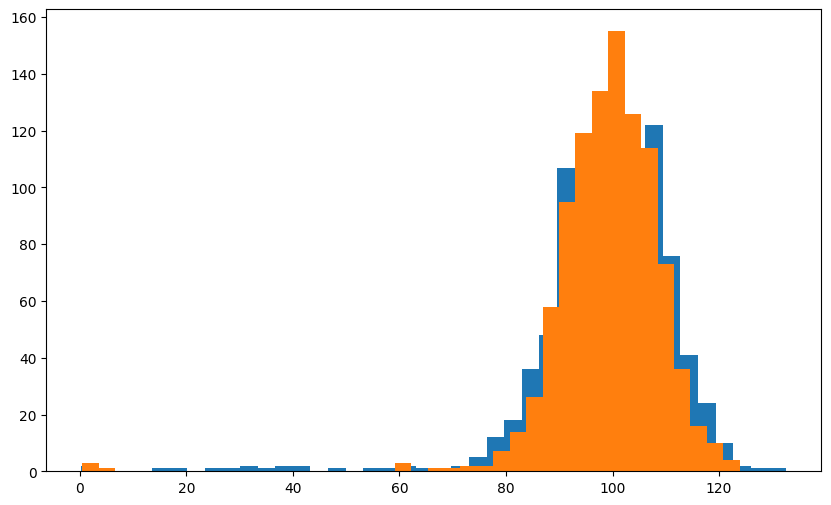

In [14]:
plt.figure(figsize=(10,6))
plt.hist(w_1[:,0], bins=40)
plt.hist(w_1s[:,0], bins=40)
plt.savefig('wealth_sim.png',dpi=400, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()